In [1]:
import pandas as pd
from tqdm import tqdm
from googleapiclient.discovery import build
import re

In [242]:
def collect_comments (video_list, result_list, api_key) :
    
    #tqdm 적용
    video_list = tqdm(video_list)

    # api 연결
    api_obj = build ('youtube', 'v3', developerKey = api_key)
    
    # 각 video의 댓글이 잘 합쳐졌는지 확인하기 위해서 
    shape_count = list()
    
    for video in video_list:
        video_id = video[17:] 
        video_list.set_description ("Collecting Comments from youtube....")
        response = api_obj.commentThreads().list(part='snippet,replies',
                                         videoId = video_id, 
                                        maxResults = 100). execute()
        # 각 비디오의 댓글 
        comments = list()
        while response:
            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comments.append([comment['textDisplay'], comment['publishedAt'],comment['likeCount']])

                if item['snippet']['totalReplyCount']>0:
                    for reply_item in item['replies']['comments']:
                        reply = reply_item['snippet']
                        comments.append([reply])
                        comments.append([reply['textDisplay'], reply['publishedAt'], reply['likeCount']])

            # page 넘겨가면서 댓글 조회 
            if 'nextPageToken' in response:
                response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
            else:
                break

        # 데이터 프레임으로 만들어주기 
        df = pd.DataFrame(comments, columns = ["comment","datetime","like_count"])
        # na 값 제거
        df = df.dropna(axis=0)
        
        # 각 비디오별 자료개수 파악
        print(f"{video_id} :  {df.shape}")
        # 합계할 리스트에 삽입
        shape_count.append(df.shape[0])

        # 최종 df로 만들기 전에 리스트에 삽입
        result_list.append(df)
        
    # 최종 df로 합쳐주기 
    result_list = pd.concat(result_list,ignore_index=True)

    if sum(shape_count) == result_list.shape[0]:
        print("합계가 일치합니다.")
        return result_list
    else:
        print(f"sum : {sum(shape_count)} / {result_list.shape[0]} 합계가 일치하지 않습니다.")
        return result_list

    

    

In [246]:
## 발급받은 youtube_apikey
api_key = "발급받은 youtube_apikey"

In [244]:
video_list_battle = ["https://youtu.be/zDN1ygokMs0"]
video_list_collabo = ["https://youtu.be/eaCoxnpPcuM"]


In [247]:
comment_battle = []

df_battle = collect_comments (video_list_battle, comment_battle, api_key)

zDN1ygokMs0 :  (648, 3)
합계가 일치합니다.


In [249]:
comment_test = []
list_test = ["https://youtu.be/CloDtGJysWk","https://youtu.be/wm-0AlTUTXk"]

df_test = collect_comments (list_test, comment_test, api_key)

CloDtGJysWk :  (603, 3)


wm-0AlTUTXk :  (2167, 3)
합계가 일치합니다.


In [252]:
print(df_test.shape)
df_test.head()


(2770, 3)


,comment,datetime,like_count
0,멋있다,2021-12-19T06:12:19Z,1.0
1,제가 연기를 잘 모르지만 하나는 알겠습니다 참 맛있게 연기를 하신다는거...응원할께요!!,2021-12-19T06:10:20Z,1.0
2,40인데 주름이 거의 없네요..?.!?!?!?!?,2021-12-19T06:07:59Z,0.0
3,구교환씨 목소리 너무매력적...^^<br>김준수씨랑 좀 비슷하기도 해요~^^허스키하...,2021-12-19T06:06:40Z,1.0
4,아 근데 잠깐 비친 조인성 존잘…,2021-12-19T06:06:23Z,0.0


In [162]:
comment_collabo = []

df_collabo = collect_comments (video_list_colaborate, comment_collabo, api_key)

eaCoxnpPcuM :  (581, 3)
합계가 일치합니다.


In [163]:
print(df_battle.shape)
df_battle.head()


(636, 3)


,comment,datetime,like_count
0,"<a href=""https://www.youtube.com/watch?v=zDN1y...",2021-12-15T18:22:51Z,0.0
1,"<a href=""https://www.youtube.com/watch?v=zDN1y...",2021-12-15T11:02:25Z,1.0
2,"<a href=""https://www.youtube.com/watch?v=zDN1y...",2021-12-15T10:30:18Z,0.0
3,심판제발 남자들 없애라!..같은 여자끼리 인정시켜! 섹시고뭐고 뚱뗑이 흔들지...,2021-12-14T19:21:06Z,1.0
4,천사 아이키! 가비 같은흐느적춤ㅋㅋ 징그럽지...근데 진심 못생김..ㅈㅅㅋㅋ어디가서...,2021-12-14T18:59:03Z,1.0


In [164]:
print(df_collabo.shape)
df_collabo.head()


(581, 3)


,comment,datetime,like_count
0,아이키 노란원피스 너무 귀엽다 증말,2021-12-08T15:25:39Z,0.0
1,허니제이 왜케 귀여움 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2021-12-05T11:19:59Z,0.0
2,"<a href=""https://www.youtube.com/watch?v=eaCox...",2021-12-02T07:43:45Z,1.0
3,몇번을 봐 이게 뭐라고..,2021-12-01T12:51:15Z,0.0
4,아이비 조합 너무 좋다..주변에서 다들 웃고 즐기는 분위기라 더 좋음,2021-11-26T18:46:08Z,3.0


In [165]:
df_battle_sorted = df_battle.sort_values(by=['datetime'],axis=0)
df_battle_sorted.head(10)

,comment,datetime,like_count
635,싸우지마... 섹시하네,2021-10-02T02:34:39Z,11.0
634,역시 최고의 수장들,2021-10-02T02:59:49Z,26.0
633,이러고 이제 가비 님이랑 아이키 님 사이 좋은 게 너무 좋다,2021-10-02T03:00:54Z,327.0
632,아 저러고 둘이 친하게 넘 웃기다고 ..,2021-10-02T03:22:23Z,277.0
631,따봉부터 이겼다,2021-10-02T04:06:01Z,47.0
630,가비 재대결 할때 동선 너무 센터에서 안비켜주네ㅋㅋㅋㅋㅋ<br>이길려고 이가는 모습...,2021-10-02T04:30:19Z,66.0
627,이 무대 보고 아이키 팬됨 헤어나올 수 업다..ㅠ,2021-10-02T04:53:20Z,642.0
624,아이키 진짜 너무 좋음 ㅜㅠㅠㅠ 터치마이바디 저걸 살리네,2021-10-02T05:05:34Z,1134.0
623,그래도 둘다 귀여워ㅠㅠㅠㅠㅠㅠ,2021-10-02T05:10:29Z,27.0
622,계단올라가서 머리흔든걸로 이긴거임? ㅋㅋ,2021-10-02T05:19:23Z,55.0


In [166]:
df_collabo_sorted = df_collabo.sort_values(by=['datetime'],axis=0)
df_collabo_sorted.head(10)

,comment,datetime,like_count
580,너무 좋다...ㅠ,2021-11-16T02:14:46Z,11.0
579,너무 잘어울린다ㅏㅋㅋ👍,2021-11-16T02:15:01Z,23.0
578,역시 잘한다👍👍,2021-11-16T02:22:42Z,12.0
577,앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 ㄹㅈㄷ 사랑해요 🤣🤣,2021-11-16T02:22:47Z,17.0
575,아이비...이거 되는조합이다,2021-11-16T02:23:43Z,76.0
574,진짜 너무 좋다 진심 그냥 좋다ㅠㅠㅠㅠ너무 감동적이고 걍 너무 좋다 벅차다,2021-11-16T02:24:27Z,13.0
573,스우파의 하와수!! 역시 잘 맞는군!ㅎㅎ,2021-11-16T02:24:27Z,11.0
572,노랑 아이키 진짜 손가락 자꾸 깨물래? 아이키 아이쿠! 사랑스러워 ~~~~~~,2021-11-16T02:24:33Z,19.0
571,스우파공연 너무 기대되요~~♡,2021-11-16T02:25:14Z,27.0
570,이 언니 또왜이래요.....그만꼬시고다녀!!!<br>오리가 노란옷까지입고선...,2021-11-16T02:26:19Z,38.0


In [167]:
df_battle_sorted['comment'] = [re.sub('[^0-9가-힣 ]', '', s) for s in df_battle_sorted['comment']]

df_battle_sorted[:10]

,comment,datetime,like_count
635,싸우지마 섹시하네,2021-10-02T02:34:39Z,11.0
634,역시 최고의 수장들,2021-10-02T02:59:49Z,26.0
633,이러고 이제 가비 님이랑 아이키 님 사이 좋은 게 너무 좋다,2021-10-02T03:00:54Z,327.0
632,아 저러고 둘이 친하게 넘 웃기다고,2021-10-02T03:22:23Z,277.0
631,따봉부터 이겼다,2021-10-02T04:06:01Z,47.0
630,가비 재대결 할때 동선 너무 센터에서 안비켜주네이길려고 이가는 모습인거 같은데그래도...,2021-10-02T04:30:19Z,66.0
627,이 무대 보고 아이키 팬됨 헤어나올 수 업다,2021-10-02T04:53:20Z,642.0
624,아이키 진짜 너무 좋음 터치마이바디 저걸 살리네,2021-10-02T05:05:34Z,1134.0
623,그래도 둘다 귀여워,2021-10-02T05:10:29Z,27.0
622,계단올라가서 머리흔든걸로 이긴거임,2021-10-02T05:19:23Z,55.0


In [168]:
df_collabo_sorted['comment'] = [re.sub('[^0-9가-힣 ]', '', s) for s in df_collabo_sorted['comment']]

df_collabo_sorted[:10]

,comment,datetime,like_count
580,너무 좋다,2021-11-16T02:14:46Z,11.0
579,너무 잘어울린다,2021-11-16T02:15:01Z,23.0
578,역시 잘한다,2021-11-16T02:22:42Z,12.0
577,앜 진짜 사랑해요,2021-11-16T02:22:47Z,17.0
575,아이비이거 되는조합이다,2021-11-16T02:23:43Z,76.0
574,진짜 너무 좋다 진심 그냥 좋다너무 감동적이고 걍 너무 좋다 벅차다,2021-11-16T02:24:27Z,13.0
573,스우파의 하와수 역시 잘 맞는군,2021-11-16T02:24:27Z,11.0
572,노랑 아이키 진짜 손가락 자꾸 깨물래 아이키 아이쿠 사랑스러워,2021-11-16T02:24:33Z,19.0
571,스우파공연 너무 기대되요,2021-11-16T02:25:14Z,27.0
570,이 언니 또왜이래요그만꼬시고다녀오리가 노란옷까지입고선,2021-11-16T02:26:19Z,38.0


In [172]:
## 중복 제거 

df_battle_sorted.drop_duplicates()

df_battle = df_battle_sorted

df_battle.head()

,comment,datetime,like_count
635,싸우지마 섹시하네,2021-10-02T02:34:39Z,11.0
634,역시 최고의 수장들,2021-10-02T02:59:49Z,26.0
633,이러고 이제 가비 님이랑 아이키 님 사이 좋은 게 너무 좋다,2021-10-02T03:00:54Z,327.0
632,아 저러고 둘이 친하게 넘 웃기다고,2021-10-02T03:22:23Z,277.0
631,따봉부터 이겼다,2021-10-02T04:06:01Z,47.0


In [240]:
df_collabo_sorted = df_collabo_sorted.drop_duplicates()

df_collabo = df_collabo_sorted

df_collabo.head()

NameError: name 'df_collabo_sorted' is not defined

In [239]:
df_battle = df_battle.dropna()

df_battle.head()

,comment,label,like_count
datetime,,,
2021-10-02 02:34:39,싸우지마 섹시하네,5.0,11.0
2021-10-02 02:59:49,역시 최고의 수장들,5.0,26.0
2021-10-02 03:00:54,이러고 이제 가비 님이랑 아이키 님 사이 좋은 게 너무 좋다,5.0,327.0
2021-10-02 03:22:23,아 저러고 둘이 친하게 넘 웃기다고,5.0,277.0
2021-10-02 04:06:01,따봉부터 이겼다,3.0,47.0


In [175]:

df_collabo.isnull().sum()
df_collabo.dropna()

,comment,datetime,like_count
580,너무 좋다,2021-11-16T02:14:46Z,11.0
579,너무 잘어울린다,2021-11-16T02:15:01Z,23.0
578,역시 잘한다,2021-11-16T02:22:42Z,12.0
577,앜 진짜 사랑해요,2021-11-16T02:22:47Z,17.0
575,아이비이거 되는조합이다,2021-11-16T02:23:43Z,76.0
...,...,...,...
2,106106 아이키 언니 입술 깨무는거 뭐야,2021-12-02T07:43:45Z,1.0
504,괜찮아요,2021-12-05T10:08:57Z,1.0
1,허니제이 왜케 귀여움,2021-12-05T11:19:59Z,0.0
0,아이키 노란원피스 너무 귀엽다 증말,2021-12-08T15:25:39Z,0.0


In [427]:
df_battle.to_excel('gabee_aiki_battle.xlsx',index=False)

In [428]:
df_collabo.to_excel('gabee_aiki_collabo.xlsx',index=False)

In [ ]:
## 수작업 라벨링 이후 

In [254]:
df_battle = pd.read_excel('gavi_aiki_battle.xlsx', index_col= [0])

In [270]:
df_collabo = pd.read_excel('gavi_aiki_collabo.xlsx' , index_col= [0])

In [9]:
df_battle.tail()

,comment,label,datetime,like_count
3.0,심판제발 남자들 없애라같은 여자끼리 인정시켜 섹시고뭐고 뚱뗑이 흔들지말고 ...,6.0,2021-12-14T19:21:06Z,1.0
2.0,10455455 둘 다 좋은데,5.0,2021-12-15T10:30:18Z,0.0
1.0,10553553 썽났다 썽났다 썽이 제대로 났다 이거 왤캐 웃기냨,1.0,2021-12-15T11:02:25Z,1.0
460.0,엄마의 모성애 발동,3.0,2021-12-15T11:10:33Z,0.0
0.0,1011171117,6.0,2021-12-15T18:22:51Z,0.0


In [262]:
df_collabo.head()


,comment,label,like_count
datetime,,,
2021-11-16 02:14:46,너무 좋다,5.0,11.0
2021-11-16 02:15:01,너무 잘어울린다,5.0,23.0
2021-11-16 02:22:42,역시 잘한다,5.0,12.0
2021-11-16 02:22:47,앜 진짜 사랑해요,5.0,17.0
2021-11-16 02:23:43,아이비이거 되는조합이다,5.0,76.0


In [261]:
df_collabo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581 entries, 2021-11-16 02:14:46 to 2021-12-10 14:46:07
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   comment     575 non-null    object  
 1   label       581 non-null    category
 2   like_count  581 non-null    float64 
dtypes: category(1), float64(1), object(1)
memory usage: 14.4+ KB


# 시각화


In [353]:
# 시각화 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as ans

In [409]:
df_battle = pd.read_excel('gavi_aiki_battle.xlsx' , index_col= [0])

In [410]:
df_collabo = pd.read_excel('gavi_aiki_collabo.xlsx' , index_col= [0])

In [431]:
# 데이터 합치기 
df_all= []

df_all.append(df_battle)
df_all.append(df_collabo)

df_all =  pd.concat(df_all, axis =0)
df_all

,comment,label,like_count
datetime,,,
2021-10-09 17:28:26,아이키가 가비 바지 벗겨준 이유 엄마의 습관이래,3.0,3053.0
2021-10-02 06:42:02,둘다 엄청 팬이지만 이 무대는 아이키가 이겼다고 생각 애초에 재대결을 하는게 말이 ...,6.0,2784.0
2021-10-02 08:33:26,말티즈처럼 온갖 성 다 내놓고 사실은 아이키랑 배틀하는 게 소원이라 맹연습했던 가비...,1.0,2342.0
2021-10-02 08:59:39,아이키님 개좋음 가오 그런 거 없고 특유의 재치랑 춤 너무 잘 추셔서 볼때마다 호감,3.0,2021.0
2021-10-03 10:52:00,가비가 아이키를 견제하는 이유는 그만큼 아이키에 대한 존경심이 깔려있기 때문임 가비...,1.0,1941.0
...,...,...,...
2021-11-26 05:22:52,석가치원 인간들의 흥을 즐거워 하며 보고계시는군,5.0,0.0
2021-11-26 17:09:23,둘이 은근 잘어울려,5.0,0.0
2021-11-26 18:46:50,아이키가비라서 아이비,5.0,0.0


In [412]:
# 전처리 함수

def preprocess_df(df):
    
    # T, Z 지우기
    df['datetime'] = [re.sub('[A-Z]'," ",s) for s in df['datetime']]
    # Z 공백 제거
    df['datetime'] = df['datetime'].str.rstrip()
    
    # 포맷 바꾸기
    df['datetime'] =pd.to_datetime(df['datetime'],
                                      format='%Y-%m-%d %H:%M:%S', errors='raise')
    # datetime - index설정  (resample사용하기 위해 - 안그러면 에러나옴)
    df = df.set_index('datetime')
    #  label type : object -> category 타입으로 바꾸기 
    df['label'] = df['label'].astype('category')
    
    return df

In [413]:
df_battle = preprocess_df(df_battle)
df_battle.head()

,comment,label,like_count
datetime,,,
2021-10-09 17:28:26,아이키가 가비 바지 벗겨준 이유 엄마의 습관이래,3.0,3053.0
2021-10-02 06:42:02,둘다 엄청 팬이지만 이 무대는 아이키가 이겼다고 생각 애초에 재대결을 하는게 말이 ...,6.0,2784.0
2021-10-02 08:33:26,말티즈처럼 온갖 성 다 내놓고 사실은 아이키랑 배틀하는 게 소원이라 맹연습했던 가비...,1.0,2342.0
2021-10-02 08:59:39,아이키님 개좋음 가오 그런 거 없고 특유의 재치랑 춤 너무 잘 추셔서 볼때마다 호감,3.0,2021.0
2021-10-03 10:52:00,가비가 아이키를 견제하는 이유는 그만큼 아이키에 대한 존경심이 깔려있기 때문임 가비...,1.0,1941.0


In [414]:
df_collabo = preprocess_df(df_collabo)
df_collabo.head()

,comment,label,like_count
datetime,,,
2021-11-16 02:30:59,둘이 비주얼적으로는 진짜 안어울리는데 은근히 또 잘 맞음 걍 함께 있는거 보면 같은...,5.0,2533.0
2021-11-16 02:45:21,우와 기존 이미지가 있는데 의상만 바꾸고도 분위기가 완전 바뀌네프로가 뭔지 보여주는...,5.0,1824.0
2021-11-16 06:23:54,가비 완전 이글거리는 상마초 유럽남 빙의됐다 제대로너무귀엽네 이 조합 아이키에게만 ...,1.0,1307.0
2021-11-16 04:20:08,나 이 두 조합에 진심이야 혐관에서 시작해 이젠 가비의 짝사랑인가 싶었는데 너무 쌍...,5.0,979.0
2021-11-16 04:12:28,아이키가 여자역할하고 가비가 남자역할한게 너무 좋다 신선해,5.0,904.0


In [415]:
df_all = preprocess_df(df_all)
df_collabo.head()

,comment,label,like_count
datetime,,,
2021-11-16 02:30:59,둘이 비주얼적으로는 진짜 안어울리는데 은근히 또 잘 맞음 걍 함께 있는거 보면 같은...,5.0,2533.0
2021-11-16 02:45:21,우와 기존 이미지가 있는데 의상만 바꾸고도 분위기가 완전 바뀌네프로가 뭔지 보여주는...,5.0,1824.0
2021-11-16 06:23:54,가비 완전 이글거리는 상마초 유럽남 빙의됐다 제대로너무귀엽네 이 조합 아이키에게만 ...,1.0,1307.0
2021-11-16 04:20:08,나 이 두 조합에 진심이야 혐관에서 시작해 이젠 가비의 짝사랑인가 싶었는데 너무 쌍...,5.0,979.0
2021-11-16 04:12:28,아이키가 여자역할하고 가비가 남자역할한게 너무 좋다 신선해,5.0,904.0


In [416]:
# 집계 함수


def count_label (df, label_num, label_name, result_list):
    df = df[df['label'] == label_num ]
    df = df.resample('D').comment.count()
    df = pd.DataFrame(df)
    df = df.rename({'comment':label_name},
                   axis=1)
    
    result_list.append(df)
    
    return result_list 


def concat_label_count(df, label_name):
    list_name = []
    category = df.label.cat.categories.tolist()

    for i in range(len(category)):
        count_label(df,i+1,label_name[i],list_name)
    
    df = pd.concat(list_name, axis =1)
    df = df.replace(np.nan, 0)
    
    return df


In [417]:
# 집계 colname
## g- gabee, a- aikee

label_name = ["g_pos","g_neg",
              "a_pos","a_neg",
              "neu","etc"]


In [418]:
df_battle_count = concat_label_count(df_battle, label_name)
df_battle_count.head()

,g_pos,g_neg,a_pos,a_neg,neu,etc
datetime,,,,,,
2021-10-02,9,5.0,11,1.0,6,6
2021-10-03,5,2.0,6,1.0,4,11
2021-10-04,2,1.0,4,0.0,2,8
2021-10-05,1,0.0,4,0.0,0,1
2021-10-06,0,5.0,4,0.0,1,10


In [419]:
df_collabo_count = concat_label_count(df_collabo, label_name)
df_collabo_count.head()

,g_pos,g_neg,a_pos,a_neg,neu,etc
datetime,,,,,,
2021-11-16,41,1.0,60.0,3.0,175.0,211.0
2021-11-17,7,0.0,7.0,0.0,5.0,18.0
2021-11-18,1,0.0,1.0,0.0,4.0,8.0
2021-11-19,1,0.0,1.0,0.0,2.0,5.0
2021-11-20,0,0.0,1.0,0.0,0.0,0.0


In [420]:
df_all_count = concat_label_count(df_all, label_name)
df_all_count.head()

,g_pos,g_neg,a_pos,a_neg,neu,etc
datetime,,,,,,
2021-10-02,9,5.0,11,1.0,6,6
2021-10-03,5,2.0,6,1.0,4,11
2021-10-04,2,1.0,4,0.0,2,8
2021-10-05,1,0.0,4,0.0,0,1
2021-10-06,0,5.0,4,0.0,1,10


In [422]:
# df_all_count의 기술통계량 확인
df_all_count.describe()

,g_pos,g_neg,a_pos,a_neg,neu,etc
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1.400000,1.613333,3.400000,0.106667,3.360000,6.213333
std,4.920997,1.923492,7.365001,0.452421,20.252888,24.639725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,2.000000,0.000000,1.000000,3.000000
75%,1.000000,2.000000,4.000000,0.000000,1.500000,4.000000
max,41.000000,8.000000,64.000000,3.000000,176.000000,215.000000


No handles with labels found to put in legend.


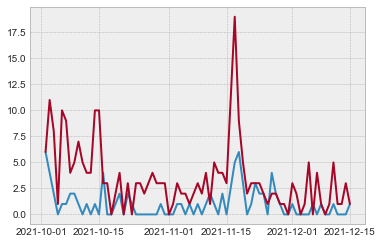

In [434]:

plt.plot(df_all_count[["neu","etc"]])
plt.legend()

In [376]:
## battle 영상의 중립 - 부정부정 빈도 확인 

print(df_battle_count.sum())
print (" ----------------------")
print(f"전체 중 {(1/df_battle_count.sum()[5])*100}%를 차지")
       

g_pos     54.0
g_neg    120.0
a_pos    183.0
a_neg      5.0
neu       55.0
etc      215.0
dtype: float64
 ----------------------
전체 중 0.46511627906976744%를 차지


In [377]:
## collabo 영상의 중립 - 부정부정 빈도 확인 

print(df_collabo_count.sum())
print (" ----------------------")
print(f"전체 중 {(1/df_collabo_count.sum()[5])*100}%를 차지")
       

g_pos     51.0
g_neg      1.0
a_pos     72.0
a_neg      3.0
neu      197.0
etc      251.0
dtype: float64
 ----------------------
전체 중 0.398406374501992%를 차지


In [ ]:
df_all_count['neu'] == 

In [423]:
#  중립을 긍정으로 간주할 경우를 위해 중립 이상치 제거

# 인덱스 = 2021-11-16에 해당되는 자료 드랍
df_all_count = df_all_count.drop("2021-11-16")



In [424]:
#  존재하지 않아 에러 발생! ( 잘 제거됌)
df_all_count_test.loc["2021-11-16"]

KeyError: '2021-11-16'

In [378]:
# df_all_count의 데이터 타입 확인
df_all_count.info(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2021-10-02 to 2021-12-15
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g_pos   75 non-null     int64  
 1   g_neg   75 non-null     float64
 2   a_pos   75 non-null     int64  
 3   a_neg   75 non-null     float64
 4   neu     75 non-null     int64  
 5   etc     75 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 6.2 KB


In [425]:
## score 계산
df_all_count['g_score'] = df_all_count['g_pos'] -  df_all_count['g_neg'] + df_all_count["neu"]
df_all_count['a_score'] = df_all_count['a_pos'] -  df_all_count['a_neg'] + df_all_count["neu"]
df_all_count.head()

,g_pos,g_neg,a_pos,a_neg,neu,etc,g_score,a_score
datetime,,,,,,,,
2021-10-02,9,5.0,11,1.0,6,6,10.0,16.0
2021-10-03,5,2.0,6,1.0,4,11,7.0,9.0
2021-10-04,2,1.0,4,0.0,2,8,3.0,6.0
2021-10-05,1,0.0,4,0.0,0,1,1.0,4.0
2021-10-06,0,5.0,4,0.0,1,10,-4.0,5.0


In [426]:
df_all_count.to_excel('df_all_count.xlsx')

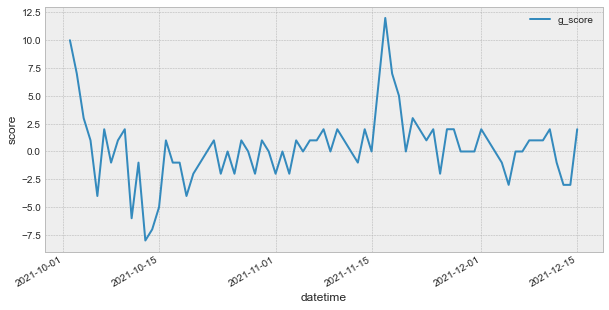

In [427]:
df_all_count['g_score'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('score')
plt.legend()

plt.show()

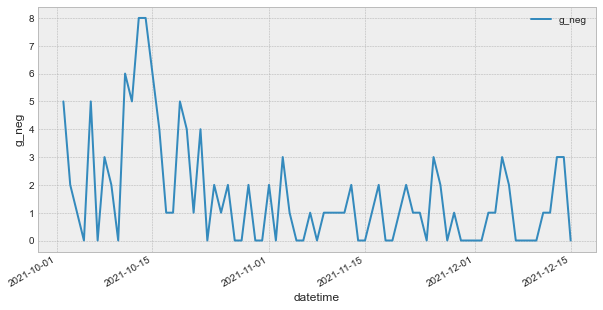

In [428]:
df_all_count['g_neg'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('g_neg')
plt.legend()

plt.show()

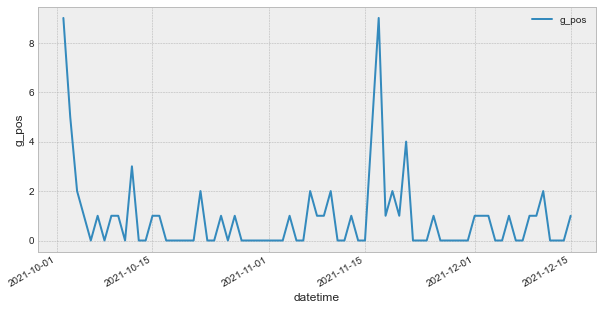

In [430]:
df_all_count['g_pos'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('g_pos')
plt.legend()

plt.show()

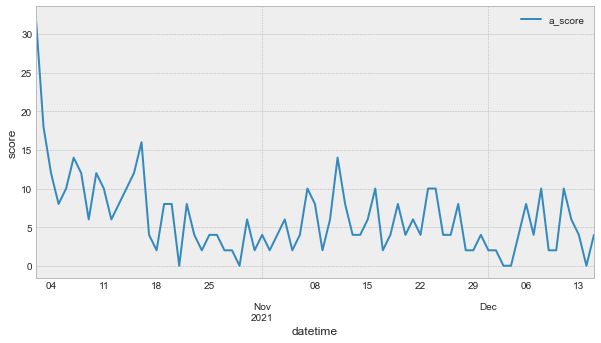

In [403]:
df_all_count['a_score'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('score')
plt.legend()


plt.show()

In [200]:
print(len(df_battle))
print(len(df_collabo))

636
581


In [217]:
df_word = df_battle['comment'].str.contains('심사|무승부|판정|엠넷|프로듀서').sum()
df_word

60

In [227]:
import math


print(f" 전체 차지 비율 : {math.floor(df_word/len(df_battle) *100)}%")

 전체 차지 비율 : 9%


In [228]:
df_noze = df_collabo['comment'].str.contains('노제').sum()
df_noze

130

In [229]:
df_honey = df_collabo['comment'].str.contains('허니|꿀|허제').sum()
df_honey

26

In [231]:
print(f" 전체 차지 비율 : {math.floor((df_noze+df_honey)/len(df_collabo) *100)}%")

 전체 차지 비율 : 26%
